# Test 

**Simple Supervised Learning with NN. Regression**

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")
import ds_boost  # just to remove tensorflow-CPU/GPU warnings

sns.set()

## 1. Data Processing

In [2]:
data_size = 500
x = np.linspace(0, 200, data_size)

y = np.array([-i * i + 1200 for i in np.linspace(-50, 50, num=data_size)])
y = y + np.random.normal(0, 100, data_size)  # add noise

df = pd.DataFrame({"x": x, "y": y})
target = ["y"]

print("rows: {} \ncolumns: {} \ntarget: {}".format(*df.shape, target))
df.head(5)

rows: 500 
columns: 2 
target: ['y']


,x,y
0,0.000000,-1313.952815
1,0.400802,-1363.061884
2,0.801603,-1346.663243
3,1.202405,-1219.991949
4,1.603206,-1305.998360


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


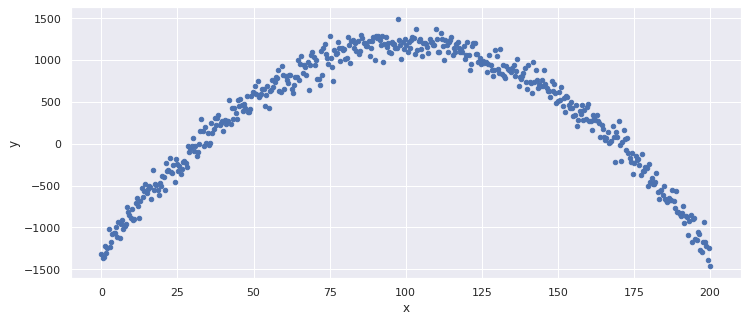

In [3]:
df.plot.scatter(x="x", y="y", figsize=(12, 5));

#### Correlation between numerical features and target

In [4]:
df.corr()

,x,y
x,1.000000,0.015618
y,0.015618,1.000000


## 2. Neural Network model

In [5]:
from sklearn.model_selection import train_test_split

data = df.copy()

# Standardize x & y
scale = {}

for col in data:
    mean, std = data[col].mean(), data[col].std()
    data[col] = (data[col] - mean) / std
    scale[col] = [mean, std]

test_size = None

train, test = train_test_split(data, test_size=test_size, random_state=9, shuffle=True)
x_train, y_train = train.drop(target, axis=1).values, train[target].values

### Build and train the Neural Network

time: 	 26.0 s


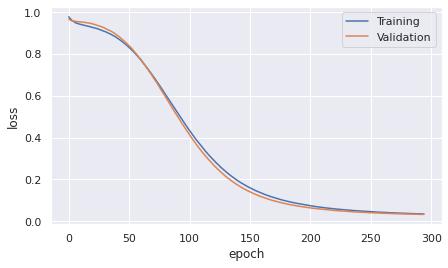

In [6]:
from time import time
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

# weights = keras.initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(8, input_dim=1, activation="tanh"))
model.add(Dense(1, activation=None))
model.compile(loss="mean_squared_error", optimizer="adam")


callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, verbose=0)]
t0 = time()

history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.25,
    callbacks=callbacks,
    verbose=0,
)

print("time: \t {:.1f} s".format(time() - t0))

hist = history.history

plt.figure(figsize=(7, 4))
plt.plot(hist["loss"], label="Training")
if "val_loss" in hist:
    plt.plot(hist["val_loss"], label="Validation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();

### Check the model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


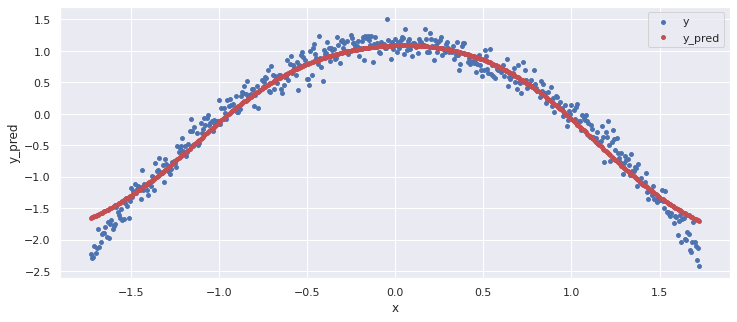

In [7]:
x_test = data.drop(target, axis=1).values

pred = model.predict(x_test, verbose=0)

df_pred = data.copy()
df_pred["y_pred"] = pred

ax = df_pred.plot.scatter("x", "y", figsize=(12, 5), s=15, label="y")
df_pred.plot.scatter("x", "y_pred", ax=ax, c="r", s=15, label="y_pred");

### Compare with non-neural network models

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Training Time:  	 0.012 s


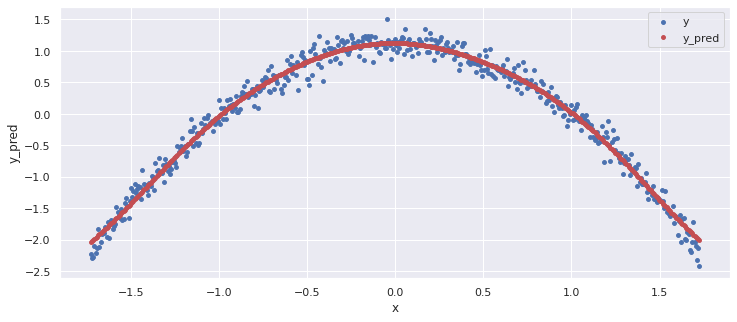

In [8]:
# Support Vector regression

from sklearn.svm import SVR

reg = None
reg = SVR(C=1)

t0 = time()

reg.fit(x_train, y_train[:, 0])

print("Training Time:  \t {:.3f} s".format(time() - t0))


train_time = time() - t0
y_pred = reg.predict(x_test)

df_pred3 = data.copy()
df_pred3["y_pred"] = y_pred

ax = df_pred3.plot.scatter("x", "y", figsize=(12, 5), s=15, label="y")
df_pred3.plot.scatter("x", "y_pred", ax=ax, c="r", s=15, label="y_pred");

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Training Time:  	 0.018 s


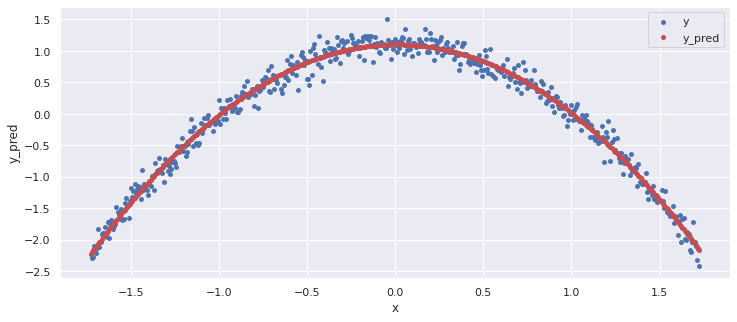

In [9]:
#  Polynomial regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

reg = None

reg = LinearRegression()

t0 = time()

reg.fit(x_train_poly, y_train[:, 0])

print("Training Time:  \t {:.3f} s".format(time() - t0))


train_time = time() - t0
y_pred = reg.predict(x_test_poly)

df_pred3 = data.copy()
df_pred3["y_pred"] = y_pred

ax = df_pred3.plot.scatter("x", "y", figsize=(12, 5), s=15, label="y")
df_pred3.plot.scatter("x", "y_pred", ax=ax, c="r", s=15, label="y_pred");